In [1]:
import cv2
import pytesseract
import numpy as np
import os
from pytesseract import Output
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

In [3]:
resume_file_paths = os.listdir(r'C:\Users\delbi\Videos\Computer vision\opencv\project\resumes')
root_folder = r'C:\Users\delbi\Videos\Computer vision\opencv\project\resumes'
resume_file_paths = [os.path.join(root_folder,i) for i in resume_file_paths]
resume_file_paths

['C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Alan Linu.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\BabuKiran.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Christopher Fowler.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Cristiano Rillu.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Ellie Reynolds.jpeg',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Harry Griffiths.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Jane Roe.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Jesna Akhil.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Jithin George.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\John D Walker.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Jonathan Smith.jpeg',
 

In [4]:
selected=[]
rejected=[]
def check_resume(resume_path,job):
    job_match=[]
    resume_image = cv2.imread(rf'{resume_path}')
    gray=cv2.cvtColor(resume_image,cv2.COLOR_BGR2GRAY)
    resume=pytesseract.image_to_string(gray)
    res=re.sub(r'[^a-zA-Z]','',resume).lower()
    for i in job:
        if ''.join(i.lower().split()) in res:
            job_match.append(i)
        else:
            pass
    percentage_match = (len(job_match)/len(job))*100
    if percentage_match>=75:
        selected.append(resume_path)
    else:
        rejected.append(resume_path)

In [5]:
job=['data analyst','data analysis','mysql','data mining','hadoop','spark','python','machine learning','tableau','matplotlib',
       'excel','R programming','data visualization','critical thinking']
for i in resume_file_paths:
    check_resume(i,job)


In [6]:
selected

['C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Alan Linu.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Cristiano Rillu.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Jesna Akhil.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Jithin George.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Manu Kurian.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Mathew Manuel.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Olivia Wilson.png']

In [7]:
# for i in selected:
#     plt.figure(figsize=(10,12),facecolor='white')
#     img=cv2.imread(i)
#     plt.imshow(img)
#     plt.show()


In [8]:
selected_resumes=[]
for i in selected:
    selected_resumes.append(os.path.basename(i))
selected_resumes

['Alan Linu.png',
 'Cristiano Rillu.png',
 'Jesna Akhil.png',
 'Jithin George.png',
 'Manu Kurian.png',
 'Mathew Manuel.png',
 'Olivia Wilson.png']

In [9]:
rejected

['C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\BabuKiran.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Christopher Fowler.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Ellie Reynolds.jpeg',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Harry Griffiths.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Jane Roe.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\John D Walker.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Jonathan Smith.jpeg',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Lilibeth Andrada.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Lydia Rodrguez.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Nadin Friedberger.png',
 'C:\\Users\\delbi\\Videos\\Computer vision\\opencv\\project\\resumes\\Nicolas A

In [10]:
Email_Address=[]
Phone_Number=[]
def email_p_number(selected,mail,p_number):
    img=cv2.imread(rf'{selected}')
    grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    data=pytesseract.image_to_data(grey,output_type=Output.DICT)
    n_boxes=len(data['text'])
       
    for i in range(n_boxes):
        if data['conf'][i]>30:
            if re.match(mail,data['text'][i]):
                x,y,w,h=data['left'][i],data['top'][i],data['width'][i],data['height'][i]
                grey=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            if re.match(p_number,data['text'][i]):
                x,y,w,h=data['left'][i],data['top'][i],data['width'][i],data['height'][i]
                grey=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    for i in range(n_boxes):
        if re.match(mail,data['text'][i]):
            Email_Address.append(data['text'][i])
            break

    for i in range(n_boxes):
        if re.match(p_number,data['text'][i]):
            Phone_Number.append(data['text'][i])
            continue
            
    plt.figure(figsize=(7,10),facecolor='white')
    plt.imshow(grey)
    plt.show()
    # cv2.imshow('inn',grey)
    # cv2.waitKey()
    # cv2.destroyAllWindows()

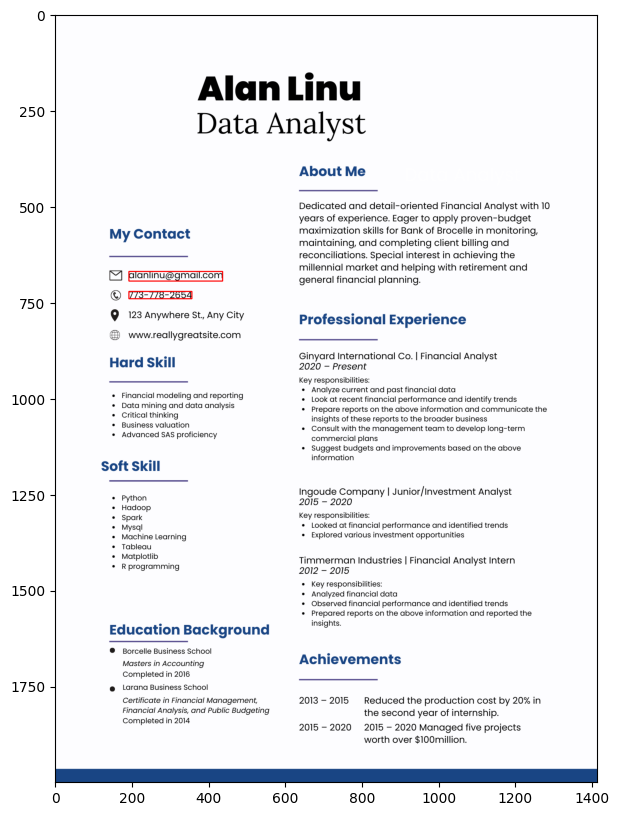

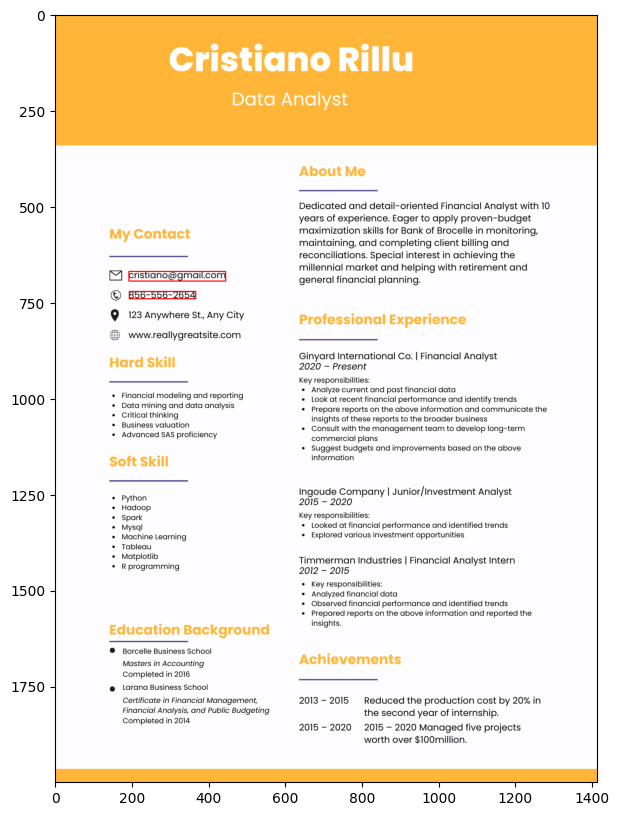

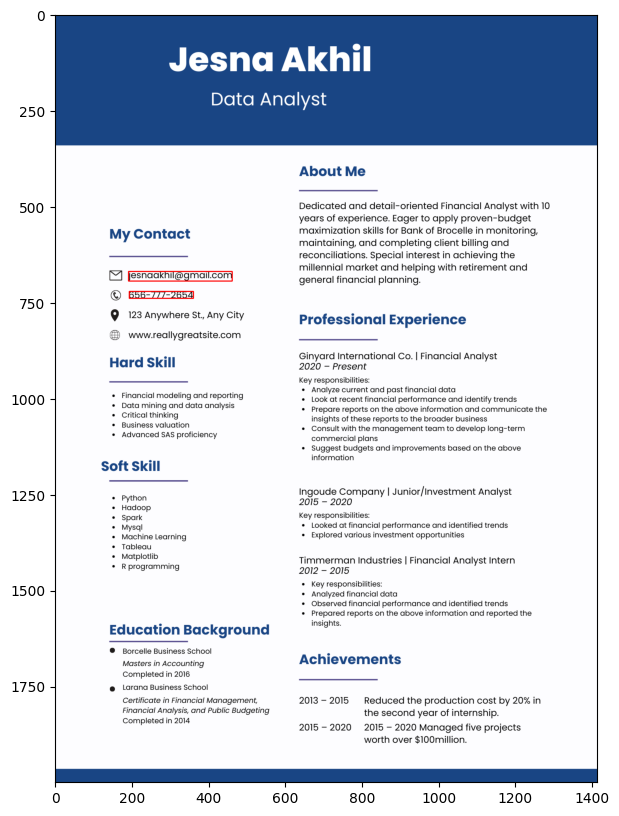

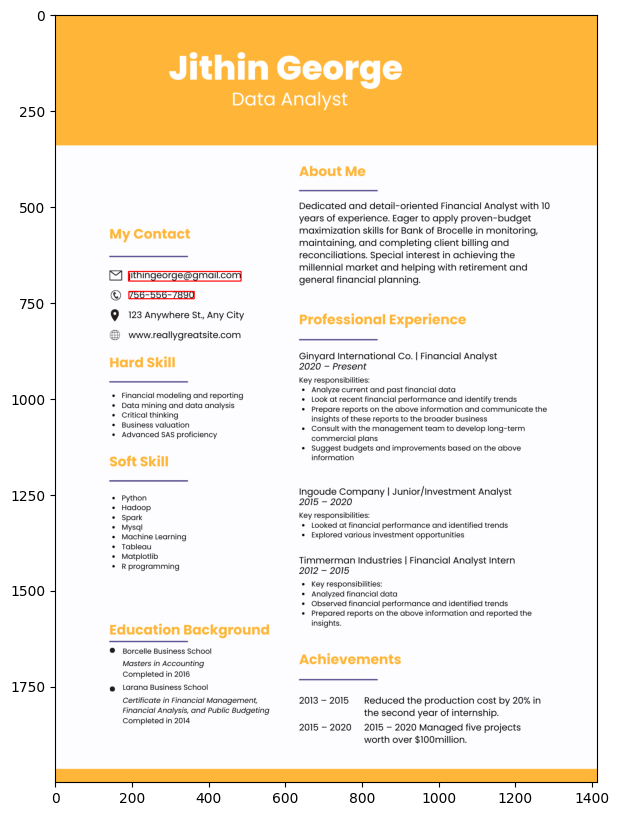

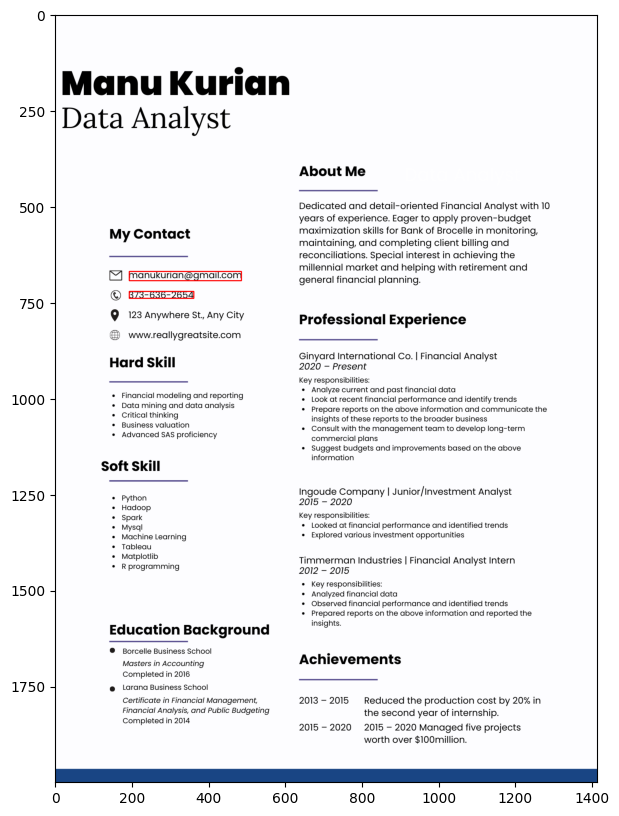

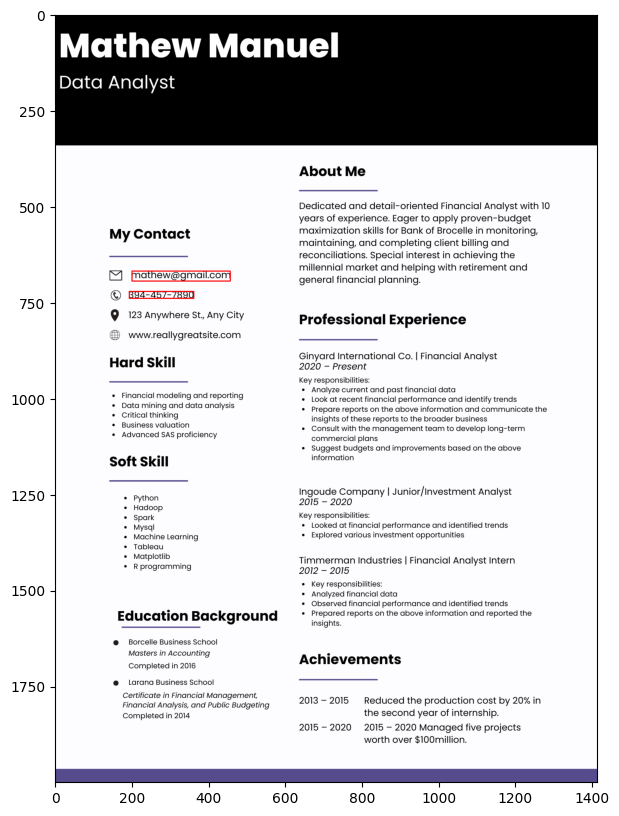

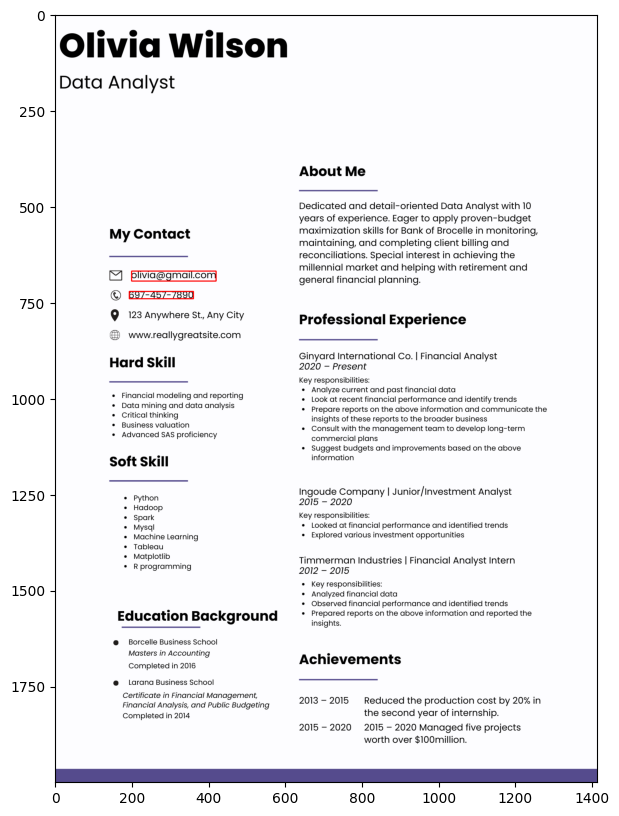

In [11]:
for i in selected:
    mail='[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+'
    p_number='[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]'
    email_p_number(i,mail,p_number)

In [12]:
Email_Address

['alanlinu@gmail.com',
 'cristiano@gmail.com',
 'jesnaakhil@gmail.com',
 'jithingeorge@gmail.com',
 'manukurian@gmail.com',
 'mathew@gmail.com',
 'olivia@gmail.com']

In [13]:
Phone_Number

['773-778-2654',
 '856-556-2654',
 '656-777-2654',
 '756-556-7890',
 '373-636-2654',
 '394-457-7890',
 '697-457-7890']

In [18]:
Applicant_Name=[]
for i in selected_resumes:
    Applicant_Name.append((os.path.splitext(i))[0])

In [15]:
import datetime
start = datetime.datetime.strptime("06-02-2023", "%d-%m-%Y")
date_generated = pd.date_range(start, periods=len(selected_resumes))
print(date_generated.strftime("%d-%m-%Y"))

Index(['06-02-2023', '07-02-2023', '08-02-2023', '09-02-2023', '10-02-2023',
       '11-02-2023', '12-02-2023'],
      dtype='object')


In [16]:
time=[]
for i in range(0,len(selected_resumes)):
    time.append('10 AM')

In [20]:
interview_list=pd.DataFrame({'Applicant Name':Applicant_Name,'Email Address':Email_Address,'Phone Number':Phone_Number,'Interview Date':date_generated})
interview_list['Day Of Week'] = interview_list['Interview Date'].dt.day_name()
interview_list['Time']=time
interview_list

,Applicant Name,Email Address,Phone Number,Interview Date,Day Of Week,Time
0,Alan Linu,alanlinu@gmail.com,773-778-2654,2023-02-06,Monday,10 AM
1,Cristiano Rillu,cristiano@gmail.com,856-556-2654,2023-02-07,Tuesday,10 AM
2,Jesna Akhil,jesnaakhil@gmail.com,656-777-2654,2023-02-08,Wednesday,10 AM
3,Jithin George,jithingeorge@gmail.com,756-556-7890,2023-02-09,Thursday,10 AM
4,Manu Kurian,manukurian@gmail.com,373-636-2654,2023-02-10,Friday,10 AM
5,Mathew Manuel,mathew@gmail.com,394-457-7890,2023-02-11,Saturday,10 AM
6,Olivia Wilson,olivia@gmail.com,697-457-7890,2023-02-12,Sunday,10 AM
